In [1]:
begin
	using Tidier
	using RDatasets
end

In [2]:
movies = RDatasets.dataset("ggplot2","movies")

Row,Title,Year,Length,Budget,Rating,Votes,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,MPAA,Action,Animation,Comedy,Drama,Documentary,Romance,Short
,String,Int32,Int32,Int32?,Float64,Int32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Int32,Int32,Int32,Int32,Int32,Int32,Int32
1,$,1971,121,missing,6.4,348,4.5,4.5,4.5,4.5,14.5,24.5,24.5,14.5,4.5,4.5,,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,missing,6.0,20,0.0,14.5,4.5,24.5,14.5,14.5,14.5,4.5,4.5,14.5,,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,missing,8.2,5,0.0,0.0,0.0,0.0,0.0,24.5,0.0,44.5,24.5,24.5,,0,1,0,0,0,0,1
4,"$40,000",1996,70,missing,8.2,6,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.5,45.5,,0,0,1,0,0,0,0
5,"$50,000 Climax Show, The",1975,71,missing,3.4,17,24.5,4.5,0.0,14.5,14.5,4.5,0.0,0.0,0.0,24.5,,0,0,0,0,0,0,0
6,$pent,2000,91,missing,4.3,45,4.5,4.5,4.5,14.5,14.5,14.5,4.5,4.5,14.5,14.5,,0,0,0,1,0,0,0
7,$windle,2002,93,missing,5.3,200,4.5,0.0,4.5,4.5,24.5,24.5,14.5,4.5,4.5,14.5,R,1,0,0,1,0,0,0
8,'15',2002,25,missing,6.7,24,4.5,4.5,4.5,4.5,4.5,14.5,14.5,14.5,4.5,14.5,,0,0,0,0,1,0,1
9,'38,1987,97,missing,6.6,18,4.5,4.5,4.5,0.0,0.0,0.0,34.5,14.5,4.5,24.5,,0,0,0,1,0,0,0


In [3]:
high_budget = @chain movies begin
	@mutate(Budget= Budget / 1_000_000)
	@filter(Budget >= mean(skipmissing(Budget)), Year > 2000)
	@select(Title, Year, Budget, Rating)
    @slice(1:100)
end

Row,Title,Year,Budget,Rating
,String,Int32,Float64?,Float64
1,13 Going On 30,2004,37.0,6.4
2,15 Minutes,2001,42.0,6.1
3,2 Fast 2 Furious,2003,76.0,5.1
4,21 Grams,2003,20.0,8.0
5,25th Hour,2002,15.0,7.8
6,3000 Miles to Graceland,2001,62.0,5.4
7,40 Days and 40 Nights,2002,17.0,5.4
8,50 First Dates,2004,75.0,6.8
9,"51st State, The",2001,28.0,6.1


In [4]:
using DataFrames

In [5]:
sorted_hb=sort(high_budget, :Rating, rev=true)
using PlotlyJS, CSV, WebIO

In [6]:
function make_hover_text(row)
    join([
        "Title: $(row.Title)<br>",
        "Year: $(row.Year)<br>",
        "Budget: $(row.Budget)<br>",
        "Rating: $(row.Rating)<br>"
    ], " ")
end

make_hover_text (generic function with 1 method)

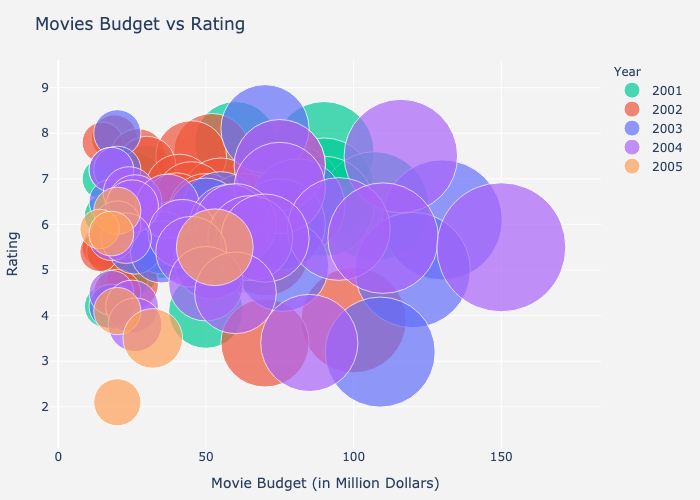

In [7]:
p = plot(sorted_hb, x=:Budget, y=:Rating, color=:Year , mode="markers",
    text=sub_df -> make_hover_text.(DataFrames.eachrow(sub_df)),
    marker=attr(size=:Budget, sizeref=2*maximum(sorted_hb.Rating) / (30^2), sizemode="area"),
    Layout(
        title="Movies Budget vs Rating",
        xaxis=attr(
            title_text="Movie Budget (in Million Dollars)",
            gridcolor="white"
        ),
        yaxis=attr(title_text="Rating", gridcolor="white"),
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)",
    ))

In [8]:
open("./example.html", "w") do io
    PlotlyBase.to_html(io, p.plot)
end

In [9]:
savefig(p.plot, "bubble.png", width=1800, height=900)

"bubble.png"